<a href="https://colab.research.google.com/github/Jacky-Yiu/CMPT459/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting the data and packages

## Downloading the data

In [ ]:
!curl https://raw.githubusercontent.com/shumanpng/CMPT459-D100-SPRING2022/main/dataset/cases_2021_test.csv --output ./cases_2021_test.csv
!curl https://raw.githubusercontent.com/shumanpng/CMPT459-D100-SPRING2022/main/dataset/cases_2021_train.csv --output ./cases_2021_train.csv
!curl https://raw.githubusercontent.com/shumanpng/CMPT459-D100-SPRING2022/main/dataset/location_2021.csv --output ./location_2021.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.4M  100 12.4M    0     0  16.3M      0 --:--:-- --:--:-- --:--:-- 16.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 27.6M  100 27.6M    0     0  19.1M      0  0:00:01  0:00:01 --:--:-- 19.1M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  499k  100  499k    0     0  2081k      0 --:--:-- --:--:-- --:--:-- 2081k


## Installing the relevant packages
You can install packages just like how normally you install packages on device,
Make sure you include `!` before the `pip install` command

In [ ]:
!pip install pandas
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
case_train = pd.read_csv('./cases_2021_train.csv')
case_train.head()

age  sex     province country  latitude  longitude date_confirmation  \
0  NaN  NaN  Maharashtra   India  19.20000   72.96667        23.05.2020   
1  NaN  NaN  Maharashtra   India  18.94017   72.83483        18.05.2020   
2  NaN  NaN  Maharashtra   India  19.20000   72.96667        28.05.2020   
3  NaN  NaN  West Bengal   India  22.80862   88.79242        09.05.2020   
4  NaN  NaN  Maharashtra   India  18.94017   72.83483        17.05.2020   

  additional_information                                             source  \
0                    NaN                                                NaN   
1                    NaN                       https://t.me/indiacovid/5075   
2                    NaN  https://phdmah.maps.arcgis.com/apps/opsdashboa...   
3                    NaN  https://www.wbhealth.gov.in/uploaded_files/cor...   
4                    NaN                                                NaN   

   chronic_disease_binary       outcome  outcome_group  
0                   False  Hospitalized            NaN  
1                   False     Recovered            NaN  
2                   False  Hospitalized            NaN  
3                   False  Hospitalized            NaN  
4                   False  Hospitalized            NaN

In [ ]:
case_train.groupby("outcome").size()

outcome
Alive                               127
Dead                                  9
Death                                 4
Deceased                           3361
Died                                  4
Discharged                            2
Discharged from hospital              3
Hospitalized                     135524
Receiving Treatment                 183
Recovered                         62875
Stable                               24
Under treatment                     243
critical condition                    1
death                                29
died                                624
discharge                           114
discharged                           82
recovered                          2435
recovering at home 03.03.2020         2
released from quarantine              3
stable                              107
stable condition                     90
dtype: int64

## Tasks 1.1

In [ ]:
outcome_group = {"Discharged": "hospitalized",
                 "Discharged from hospital": "hospitalized", 
                 "Hospitalized": "hospitalized",
                 "critical condition": "hospitalized",
                 "discharge": "hospitalized",
                 "discharged": "hospitalized", 
                 "Alive": "nonhospitalized",
                 "Receiving Treatment": "nonhospitalized", 
                 "Stable": "nonhospitalized",
                 "Under treatment": "nonhospitalized", 
                 "recovering at home 03.03.2020": "nonhospitalized", 
                 "released from quarantine": "nonhospitalized", 
                 "stable": "nonhospitalized",
                 "stable condition": "nonhospitalized",
                 "Dead":"deceased",
                 "Death":"deceased", 
                 "Deceased":"deceased", 
                 "Died":"deceased", 
                 "death":"deceased", 
                 "died":"deceased",
                 "Recovered": "recovered", 
                 "recovered": "recovered"}


In [ ]:
case_train.outcome_group = case_train.apply(lambda row: outcome_group[row.outcome], axis=1)

In [ ]:
case_train.groupby("outcome_group").size()

outcome_group
deceased             4031
hospitalized       135726
nonhospitalized       779
recovered           65310
dtype: int64

In [ ]:
case_train = case_train.drop("outcome", axis=1)

In [ ]:
case_train.to_csv('./my_1.1_result.csv')
case_train.head()

age  sex     province country  latitude  longitude date_confirmation  \
0  NaN  NaN  Maharashtra   India  19.20000   72.96667        23.05.2020   
1  NaN  NaN  Maharashtra   India  18.94017   72.83483        18.05.2020   
2  NaN  NaN  Maharashtra   India  19.20000   72.96667        28.05.2020   
3  NaN  NaN  West Bengal   India  22.80862   88.79242        09.05.2020   
4  NaN  NaN  Maharashtra   India  18.94017   72.83483        17.05.2020   

  additional_information                                             source  \
0                    NaN                                                NaN   
1                    NaN                       https://t.me/indiacovid/5075   
2                    NaN  https://phdmah.maps.arcgis.com/apps/opsdashboa...   
3                    NaN  https://www.wbhealth.gov.in/uploaded_files/cor...   
4                    NaN                                                NaN   

   chronic_disease_binary outcome_group  
0                   False  hospitalized  
1                   False     recovered  
2                   False  hospitalized  
3                   False  hospitalized  
4                   False  hospitalized

#1.2
classification


## 1.3

In [ ]:
!pip install Matplotlib
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
case_location = pd.read_csv('./location_2021.csv')
case_test = pd.read_csv('./cases_2021_test.csv')

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

count of null in each coloum

In [ ]:
case_train.isnull().sum()

age                       182793
sex                       180362
province                     604
country                        1
latitude                       0
longitude                      0
date_confirmation             51
additional_information    193444
source                     18394
chronic_disease_binary         0
outcome_group                  0
dtype: int64

In [ ]:
case_location.isnull().sum()

Province_State          174
Country_Region            0
Last_Update               0
Lat                      89
Long_                    89
Confirmed                 0
Deaths                    0
Recovered              3275
Active                 3275
Combined_Key              0
Incident_Rate            90
Case_Fatality_Ratio      48
dtype: int64

In [ ]:
case_test.isnull().sum()

age                        90013
sex                        88765
province                     296
country                        1
latitude                       0
longitude                      0
date_confirmation             23
additional_information     95206
source                      9160
chronic_disease_binary         0
outcome_group             101387
dtype: int64

## 1.3.1 Exploratory Data Analysis for Training data Set

In [ ]:
case_train.describe()

latitude      longitude
count  205846.000000  205846.000000
mean       21.066721      76.874266
std         5.413266       8.649030
min       -34.928900    -123.100000
25%        18.940170      72.834830
50%        19.387650      75.566670
75%        25.151460      78.854230
max        49.250000     153.400000

In [ ]:
case_train_time = case_train[case_train.date_confirmation != "25.02.2020 - 26.02.2020"]
case_train_time['date_confirmation'] = pd.to_datetime(case_train_time['date_confirmation'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("max: ",case_train_time['date_confirmation'].max())
print("min: ",case_train_time['date_confirmation'].min())
print("median: ",case_train_time['date_confirmation'].median())
print("mode : ",case_train_time['date_confirmation'].mode())

max:  2020-12-05 00:00:00
min:  2020-01-02 00:00:00
median:  2020-05-22 00:00:00
mode :  0   2020-05-29
dtype: datetime64[ns]


In [ ]:
case_train['age'].value_counts()

30       775
25       660
40       647
35       643
32       625
        ... 
0.75       1
29.6       1
15-88      1
93         1
101        1
Name: age, Length: 129, dtype: int64

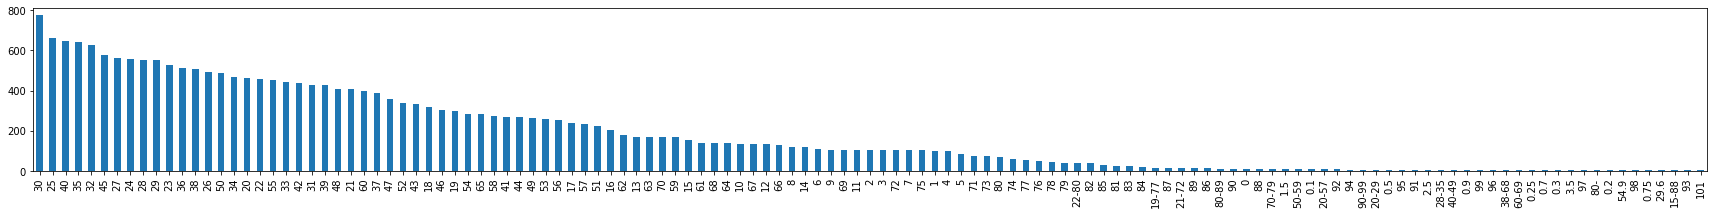

In [ ]:
case_train['age'].value_counts().plot(kind='bar',figsize=(30,3))

In [ ]:
case_train['country'].value_counts()

India                       201742
Philippines                   3018
Ghana                          247
Nigeria                        183
China                          172
Ethiopia                        79
Singapore                       78
Cameroon                        48
United States                   34
Zimbabwe                        29
Vietnam                         18
Australia                       18
South Korea                     15
Zambia                          15
Kenya                           12
Tanzania                        12
Togo                            11
Niger                           11
Japan                            8
Algeria                          7
Eswatini                         7
Romania                          6
Guinea                           6
France                           5
Gambia                           5
Eritrea                          5
Canada                           4
Sudan                            4
Italy               

Bar Chart of country

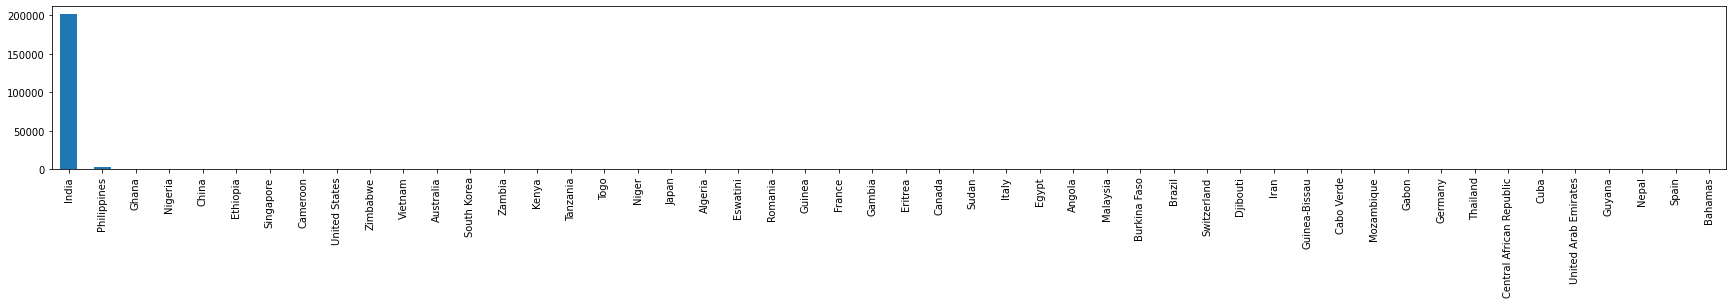

In [ ]:
case_train["country"].value_counts().plot(kind='bar',figsize=(30,3))

Bar Chart of country( excluding india and the Philippines)

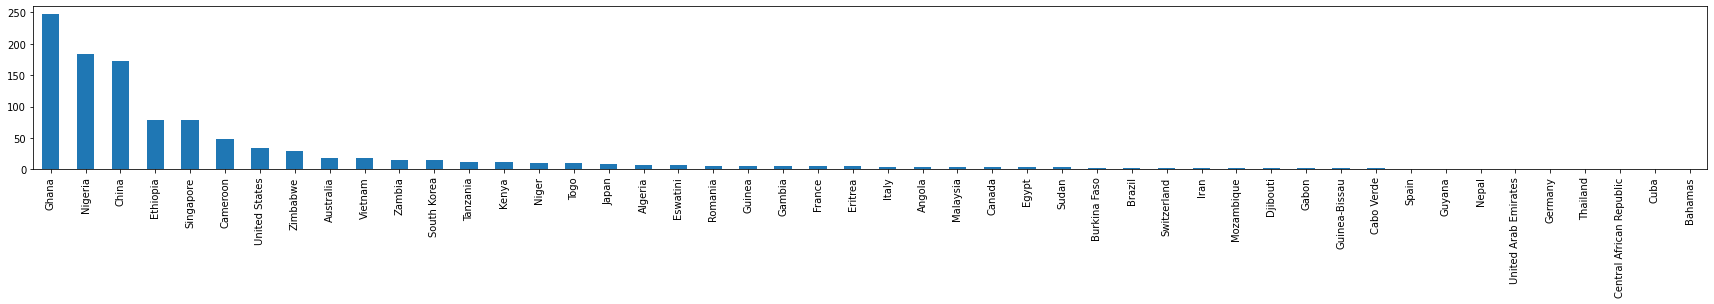

In [ ]:
  case_train[(case_train.country != "India") & (case_train.country != "Philippines")]["country"].value_counts().plot(kind='bar',figsize=(30,3))

In [ ]:
case_train['province'].value_counts()

Maharashtra         71459
Tamil Nadu          24038
Delhi               19598
Gujarat             19125
Rajasthan            9932
                    ...  
South Dakota            1
Sarangani               1
British Columbia        1
Lombardia               1
New Mexico              1
Name: province, Length: 193, dtype: int64

Bar Chart for outcome group

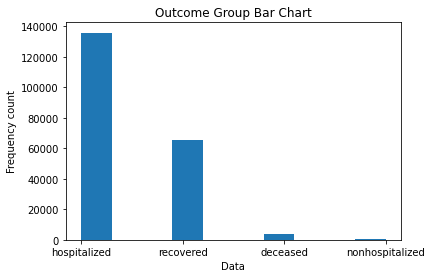

In [ ]:
plt.hist(case_train['outcome_group'])
plt.ylabel('Frequency count')
plt.xlabel('Data');
plt.title('Outcome Group Bar Chart')
plt.show()

histogram for latitude

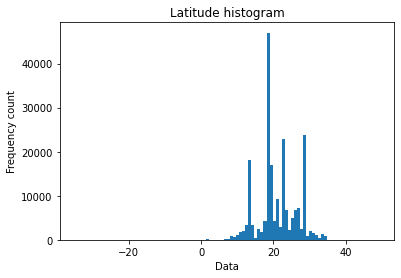

In [ ]:
plt.hist(case_train['latitude'], bins=100)
plt.ylabel('Frequency count')
plt.xlabel('Data');
plt.title('Latitude histogram')
plt.show()

histogram for longitude

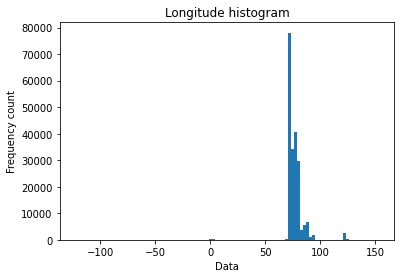

In [ ]:
plt.hist(case_train['longitude'], bins=100)
plt.ylabel('Frequency count')
plt.xlabel('Data');
plt.title('Longitude histogram')
plt.show()

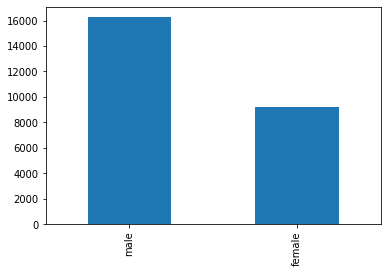

In [ ]:
case_train['sex'].value_counts().plot(kind='bar')

Visualization of Logitude and Latititude in a map

In [ ]:
import folium
import numpy as np

In [ ]:
m3=folium.Map(location=case_train[["latitude", "longitude"]].values[0], zoom_start=100)
# folium.Marker(case_train[["latitude", "longitude"]].values[0], popup='<b>Location 1</b>').add_to(m3)
lst_case_train =case_train[["latitude", "longitude"]].values


for i in range(len(lst_case_train)):
  folium.CircleMarker(lst_case_train[i].tolist(), radius=8, color='blue', fill=True).add_to(m3)

m3.save('map1.html')


m3

KeyboardInterrupt: ignored

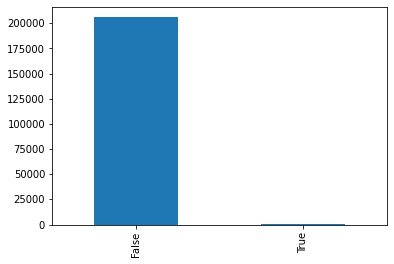

In [ ]:
case_train['chronic_disease_binary'].value_counts().plot(kind='bar')

#1.3.2 Exploratory Data Analysis of Location Dataset

In [ ]:
case_location.head()

Province_State Country_Region          Last_Update       Lat      Long_  \
0            NaN    Afghanistan  2021-04-01 04:27:05  33.93911  67.709953   
1            NaN        Albania  2021-04-01 04:27:05  41.15330  20.168300   
2            NaN        Algeria  2021-04-01 04:27:05  28.03390   1.659600   
3            NaN        Andorra  2021-04-01 04:27:05  42.50630   1.521800   
4            NaN         Angola  2021-04-01 04:27:05 -11.20270  17.873900   

   Confirmed  Deaths  Recovered   Active Combined_Key  Incident_Rate  \
0      56454    2484    51550.0   2420.0  Afghanistan     145.020308   
1     125157    2235    91271.0  31651.0      Albania    4349.051359   
2     117192    3093    81538.0  32561.0      Algeria     267.250200   
3      12010     115    11315.0    580.0      Andorra   15543.907332   
4      22311     537    20493.0   1281.0       Angola      67.884191   

   Case_Fatality_Ratio  
0             4.400043  
1             1.785757  
2             2.639259  
3             0.957535  
4             2.406884

In [ ]:
case_location["Last_Update"] = pd.to_datetime(case_location["Last_Update"])

In [ ]:
case_location.describe()

Lat        Long_     Confirmed         Deaths     Recovered  \
count  3915.000000  3915.000000  4.004000e+03    4004.000000  7.290000e+02   
mean     35.816832   -71.326815  3.230036e+04     726.707293  1.003008e+05   
std      13.225854    54.888966  1.668844e+05    4083.385291  2.740102e+05   
min     -52.368000  -178.116500  0.000000e+00       0.000000  0.000000e+00   
25%      33.208763   -96.588297  1.040750e+03      17.000000  4.760000e+02   
50%      37.901449   -86.764210  2.885500e+03      53.000000  1.374000e+04   
75%      42.180139   -77.393473  1.158100e+04     184.500000  6.164000e+04   
max      71.706900   178.065000  4.611392e+06  111489.000000  3.014226e+06   

             Active  Incident_Rate  Case_Fatality_Ratio  
count  7.290000e+02    3914.000000          3956.000000  
mean   3.641657e+04    8171.695608             2.754151  
std    2.184699e+05    3915.612165            42.189765  
min    0.000000e+00       0.000000             0.000000  
25%    2.460000e+02    5931.162023             1.201751  
50%    2.602000e+03    8754.610859             1.781170  
75%    1.955800e+04   10706.943820             2.507726  
max    4.251829e+06   35307.704999          2648.837209

In [ ]:
print("max: ",case_location["Last_Update"].max())
print("min: ",case_location["Last_Update"].min())
print("median: ",case_location["Last_Update"].median())
print("mode : ",case_location["Last_Update"].mode())

max:  2021-04-02 15:13:53
min:  2020-08-04 02:27:56
median:  2021-04-01 04:27:05
mode :  0   2021-04-01 04:27:05
dtype: datetime64[ns]


In [ ]:
pd.set_option('display.max_rows', case_location['Country_Region'].shape[0]+1)
case_location['Country_Region'].value_counts()

US                                  3277
Russia                                83
Japan                                 49
India                                 37
Colombia                              34
China                                 34
Mexico                                33
Brazil                                27
Ukraine                               27
Peru                                  26
Sweden                                21
Italy                                 21
Spain                                 20
Germany                               17
Chile                                 17
Malaysia                              17
Netherlands                           17
United Kingdom                        16
Canada                                16
Belgium                               12
France                                12
Australia                              8
Pakistan                               7
Denmark                                3
New Zealand     

Bar Chart of Country 

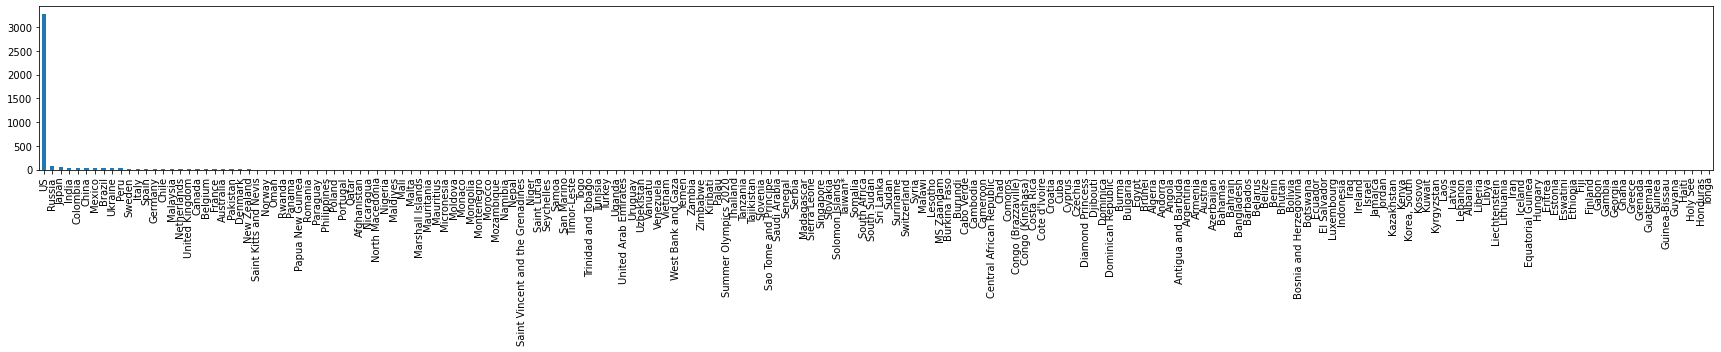

In [ ]:
case_location['Country_Region'].value_counts().plot(kind='bar',figsize=(30,3))

Bar Chart of Country (exclude US)

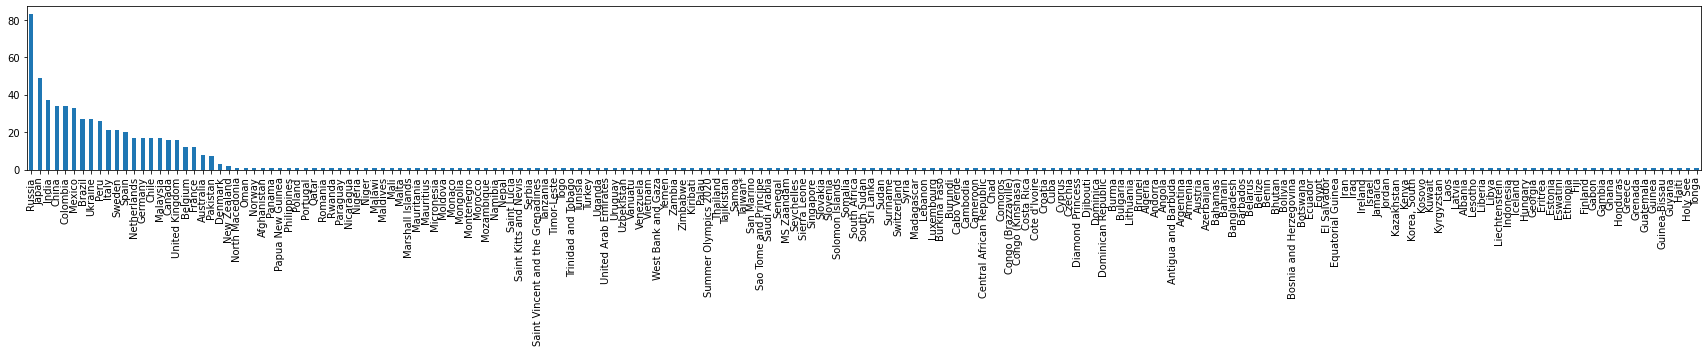

In [ ]:
case_location[(case_location.Country_Region != "US")]['Country_Region'].value_counts().plot(kind='bar',figsize=(30,3))

Visualization of Logitude and Latititude in a map

In [ ]:
m_location = folium.Map(location=case_location[["Lat", "Long_"]].values[0].tolist(), zoom_start=100)
lst_location =case_location[["Lat", "Long_"]].dropna().values

folium.Marker(lst_location[0].tolist(), popup='<b>Location 1</b>').add_to(m_location)



for i in range(len(lst_location)):
  folium.CircleMarker(lst_location[i].tolist(), radius=1, color='blue', fill=True).add_to(m_location)

m_location.save('map_location.html')


m_location

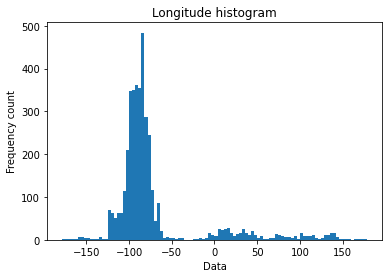

In [ ]:
plt.hist(case_location['Long_'], bins=100)
plt.ylabel('Frequency count')
plt.xlabel('Data');
plt.title('Longitude histogram')
plt.show()

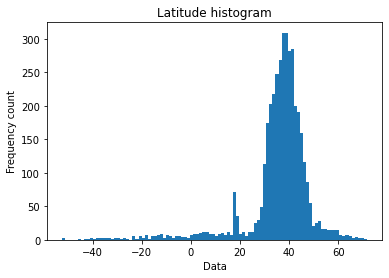

In [ ]:
plt.hist(case_location['Lat'], bins=100)
plt.ylabel('Frequency count')
plt.xlabel('Data');
plt.title('Latitude histogram')
plt.show()

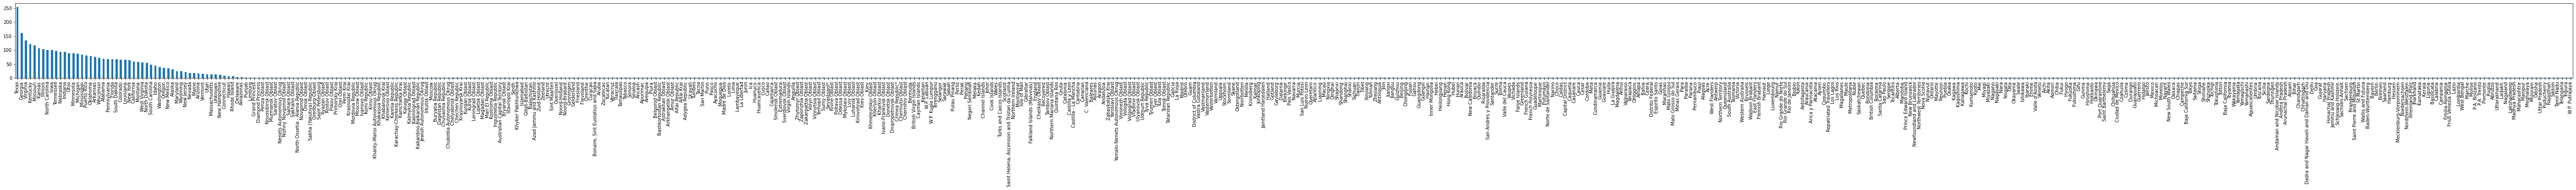

In [ ]:
case_location['Province_State'].value_counts().plot(kind='bar',figsize=(100,3))

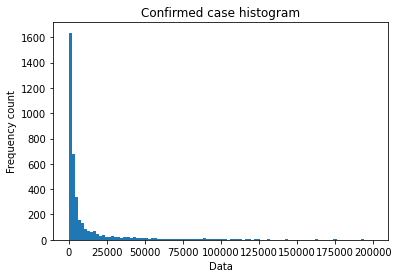

In [ ]:
plt.hist(case_location['Confirmed'], range=(0,200000), bins=100)
plt.ylabel('Frequency count')
plt.xlabel('Data');
plt.title('Confirmed case histogram')
plt.show()

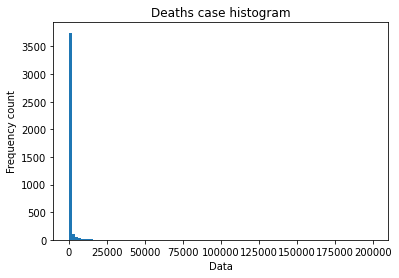

In [ ]:
plt.hist(case_location['Deaths'], range=(0,200000), bins=100)
plt.ylabel('Frequency count')
plt.xlabel('Data');
plt.title('Deaths case histogram')
plt.show()

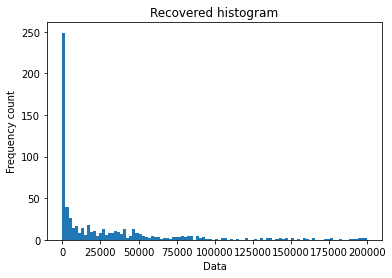

In [ ]:
plt.hist(case_location['Recovered'],range=(0,200000), bins=100)
plt.ylabel('Frequency count')
plt.xlabel('Data');
plt.title('Recovered histogram')
plt.show()

#1.3.3 Exploratory Data Analysis of Testing Dataset

In [ ]:
case_test.describe()

latitude      longitude  outcome_group
count  101387.000000  101387.000000            0.0
mean       21.055607      76.863456            NaN
std         5.390143       8.642215            NaN
min       -34.928900    -123.100000            NaN
25%        18.940170      72.834830            NaN
50%        19.387650      75.566670            NaN
75%        25.080000      78.776840            NaN
max        49.250000     153.400000            NaN

In [ ]:
case_test['date_confirmation'] = pd.to_datetime(case_test['date_confirmation'])

In [ ]:
print("max: ",case_test['date_confirmation'].max())
print("min: ",case_test['date_confirmation'].min())
print("median: ",case_test['date_confirmation'].median())
print("mode : ",case_test['date_confirmation'].mode())

max:  2020-12-05 00:00:00
min:  2020-01-02 00:00:00
median:  2020-05-22 00:00:00
mode :  0   2020-05-29
dtype: datetime64[ns]


In [ ]:
case_test['age'].value_counts()

30       386
32       318
35       306
25       305
40       302
26       301
24       276
29       270
27       268
28       267
22       259
45       258
50       251
38       250
34       238
23       234
36       231
42       225
33       213
20       213
55       212
31       203
48       200
39       192
21       188
60       182
47       182
37       176
52       176
43       172
18       171
46       158
44       156
41       147
65       143
19       140
49       136
57       136
58       132
54       127
56       122
53       120
51       118
17        97
15        91
70        90
14        85
63        83
64        82
59        82
62        80
61        79
13        71
16        70
10        67
11        64
68        64
67        63
1         62
8         60
66        57
7         56
12        56
3         56
75        54
2         51
6         49
72        46
74        45
71        44
9         43
69        43
73        42
4         42
5         38
80        35
78        31

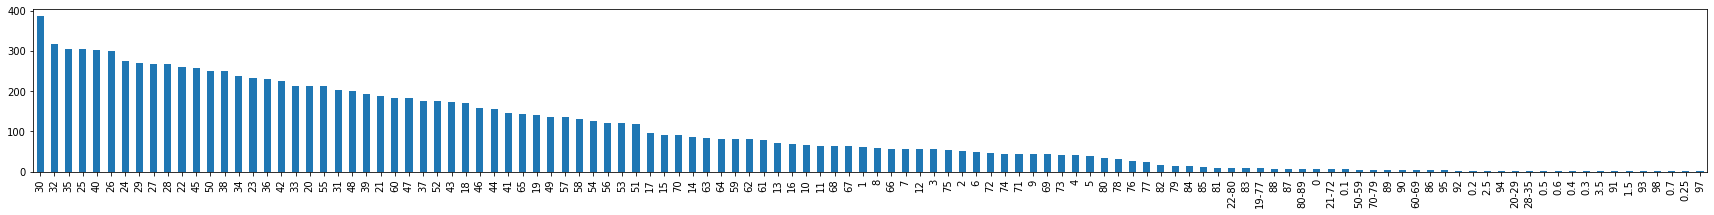

In [ ]:
case_test['age'].value_counts().plot(kind='bar',figsize=(30,3))

In [ ]:
case_test['country'].value_counts()

India                   99378
Philippines              1487
Ghana                     131
China                      83
Nigeria                    74
Ethiopia                   42
Singapore                  40
Cameroon                   30
United States              18
Vietnam                    14
South Korea                11
Zambia                      7
Zimbabwe                    7
Australia                   6
Mozambique                  5
Togo                        4
Niger                       4
Gabon                       4
Japan                       4
Italy                       3
Romania                     2
Cabo Verde                  2
Canada                      2
Eswatini                    2
Malaysia                    2
Iran                        2
France                      2
Guinea                      2
Kenya                       2
Algeria                     2
Germany                     2
Nepal                       1
Tanzania                    1
United Ara

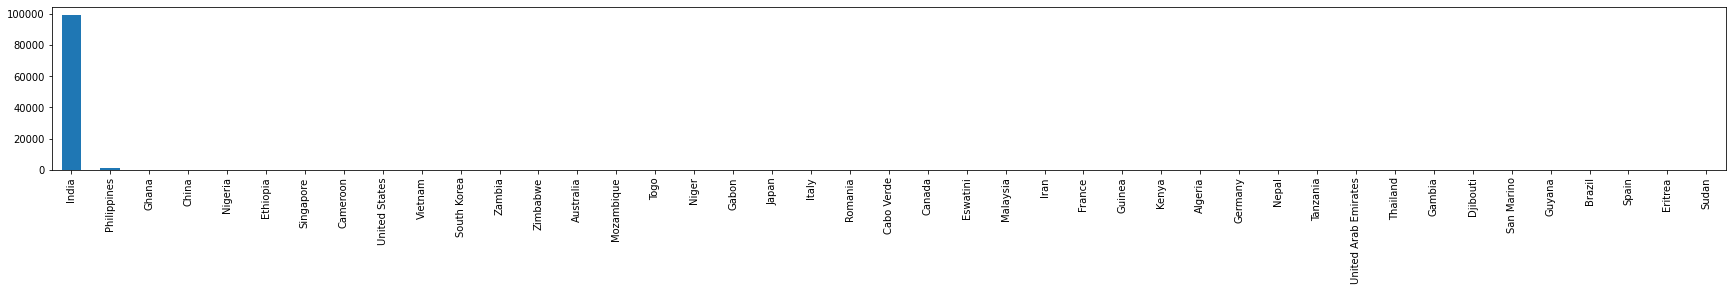

In [ ]:
case_test["country"].value_counts().plot(kind='bar',figsize=(30,3))

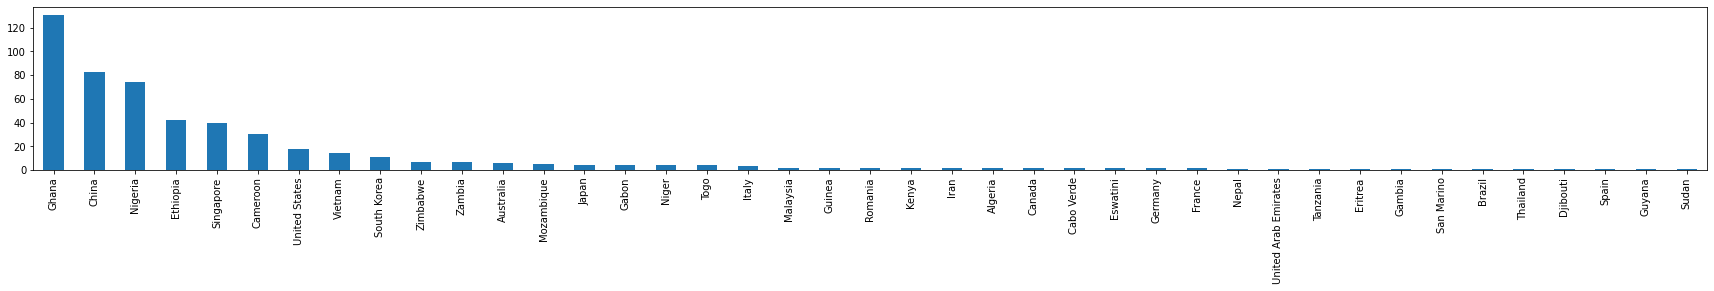

In [ ]:
case_test[(case_test.country != "India") & (case_test.country != "Philippines")]["country"].value_counts().plot(kind='bar',figsize=(30,3))

In [ ]:
case_test['province'].value_counts()

Maharashtra                                 35056
Tamil Nadu                                  11901
Delhi                                        9574
Gujarat                                      9488
Rajasthan                                    5039
Madhya Pradesh                               4402
Uttar Pradesh                                4345
West Bengal                                  3109
Andhra Pradesh                               2217
Bihar                                        1976
State Unassigned                             1942
Karnataka                                    1514
Punjab                                       1400
Telangana                                    1315
Jammu and Kashmir                            1128
Haryana                                      1112
Odisha                                       1086
Metro Manila                                 1030
Assam                                         562
Kerala                                        541


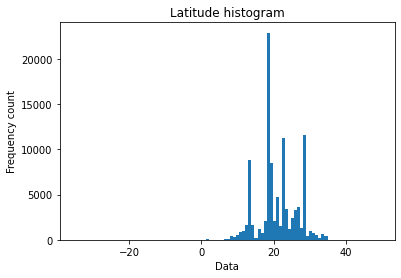

In [ ]:
plt.hist(case_test['latitude'], bins=100)
plt.ylabel('Frequency count')
plt.xlabel('Data');
plt.title('Latitude histogram')
plt.show()

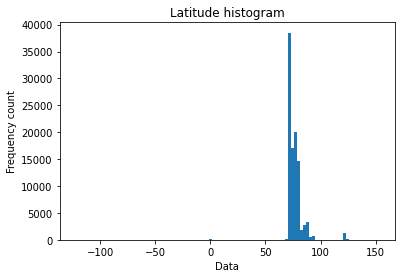

In [ ]:
plt.hist(case_test['longitude'], bins=100)
plt.ylabel('Frequency count')
plt.xlabel('Data');
plt.title('Latitude histogram')
plt.show()

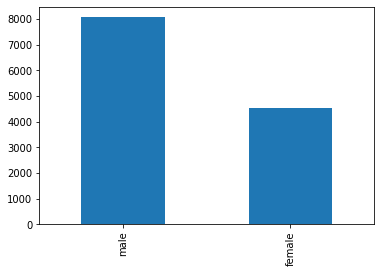

In [ ]:
case_test['sex'].value_counts().plot(kind='bar')

In [ ]:
m3=folium.Map(location=case_test[["latitude", "longitude"]].values[0], zoom_start=100)
# folium.Marker(case_train[["latitude", "longitude"]].values[0], popup='<b>Location 1</b>').add_to(m3)
lst_case_test =case_test[["latitude", "longitude"]].values


for i in range(len(lst_case_test)):
  folium.CircleMarker(lst_case_test[i].tolist(), radius=8, color='blue', fill=True).add_to(m3)

m3.save('map_test.html')


m3

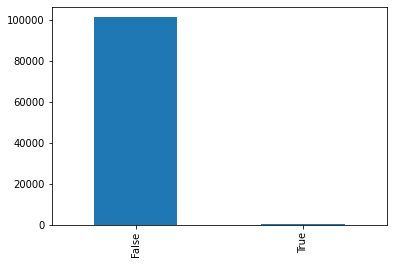

In [ ]:
case_test['chronic_disease_binary'].value_counts().plot(kind='bar')

#1.4 Data cleaning and imputing missing values

# 1.4.1 Impute Training Data Set

In [ ]:
case_train_drop_age = case_train.dropna(subset=['age'])
case_train_drop_age.age

5         40
43        37
46        40
48        27
52        54
          ..
205787    17
205789    25
205792    16
205810    52
205826    39
Name: age, Length: 23053, dtype: object

In [ ]:
def convert_data(data):
  if type(data) == str:
    if "-" in data:
      a = data.split("-")[0]
      b = data.split("-")[1]
      if b == "":
        data=a
      else:
        data = (int(a)+int(b))/2
    return round(float(data))
  elif type(data) == float:
    data = int(round(data))
  else:
    return data
  return data

In [ ]:
pd.set_option('display.max_rows', case_train_drop_age.shape[0]+1)
case_train_drop_age.groupby("age").size()


age
0         10
0.1        7
0.2        1
0.25       2
0.3        2
0.5        4
0.7        2
0.75       1
0.9        2
1         99
1.5        7
10       135
101        1
11       104
12       131
13       170
14       116
15       155
15-88      1
16       201
17       236
18       320
19       298
19-77     14
2        103
2.5        3
20       461
20-29      4
20-57      7
21       406
21-72     12
22       457
22-80     37
23       529
24       555
25       660
26       492
27       560
28       554
28-35      2
29       553
29.6       1
3        102
3.5        2
30       775
31       427
32       625
33       443
34       465
35       643
36       512
37       386
38       505
38-68      2
39       426
4         97
40       647
40-49      2
41       267
42       437
43       332
44       266
45       578
46       304
47       358
48       408
49       265
5         85
50       487
50-59      7
51       225
52       340
53       260
54       284
54.9       1
55       451
56      

In [ ]:
case_train_drop_age.age = case_train_drop_age.apply(lambda row: convert_data(str(row.age)), axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
case_train_drop_age.groupby("age").size()

age
0       26
1      104
2      113
3      102
4       99
5       85
6      106
7      102
8      119
9      105
10     135
11     104
12     131
13     170
14     116
15     155
16     201
17     236
18     320
19     298
20     461
21     406
22     457
23     529
24     559
25     660
26     492
27     560
28     554
29     553
30     776
31     427
32     627
33     443
34     465
35     643
36     512
37     386
38     512
39     426
40     647
41     267
42     437
43     332
44     268
45     578
46     316
47     358
48     422
49     265
50     487
51     262
52     341
53     262
54     291
55     452
56     251
57     231
58     272
59     168
60     398
61     140
62     176
63     170
64     141
65     281
66     126
67     133
68     140
69     105
70     169
71      72
72     102
73      71
74      67
75     102
76      50
77      52
78      44
79      37
80      70
81      24
82      36
83      22
84      29
85      30
86      11
87      14
88       8
89      11
90    

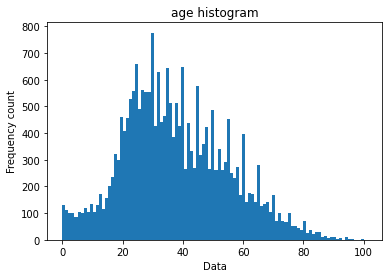

In [ ]:
plt.hist(case_train_drop_age['age'], bins=100)
plt.ylabel('Frequency count')
plt.xlabel('Data');
plt.title('age histogram')
plt.show()

2.5% of data do not have info on sex

In [ ]:
case_train_drop_age['sex'].isna().sum() /  case_train_drop_age['sex'].count()

0.025170098279005647

In [ ]:
case_train_drop_age['sex'].value_counts(normalize=True)


male      0.636679
female    0.363321
Name: sex, dtype: float64

a random genarator build on the distribution of male to female

In [ ]:
import random
def random_genarator(data):
  if data != "male" and data !="female":
    num = random.random()
    if num >= 0.36:
      data = "male"
    else:
      data = "female"
  return data

In [ ]:
case_train_drop_age.sex = case_train_drop_age.apply(lambda row: random_genarator(row.sex), axis=1)
case_train_drop_age['sex'].value_counts(normalize=True,dropna=False)

male      0.636273
female    0.363727
Name: sex, dtype: float64

impute missing date with mode of the country of that row 

In [ ]:
def fill_missing_date(row,table):
  if row.date_confirmation == 0:

    # get mode of 
    mode = table["date_confirmation"][table["country"] == row["country"]].mode()[0]
    if mode == 0:
      return table["date_confirmation"].mode()[0]
    return mode
  return row.date_confirmation

In [ ]:
case_train_drop_age.date_confirmation.fillna(0, inplace=True)
case_train_drop_age["date_confirmation"] = \
case_train_drop_age.apply(lambda row: fill_missing_date( row, case_train_drop_age), axis=1)
case_train_drop_age.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


age     sex    province country  latitude  longitude date_confirmation  \
5    40  female  Tamil Nadu   India  13.08362   80.28252        17.05.2020   
43   37    male  Tamil Nadu   India  12.68224   79.98008        04.05.2020   
46   40    male  Tamil Nadu   India   8.96350   77.30821        04.05.2020   
48   27    male  Tamil Nadu   India  13.08362   80.28252        13.05.2020   
52   54    male  Tamil Nadu   India  10.38486   78.79294        27.05.2020   

   additional_information                                             source  \
5                     NaN  https://stopcorona.tn.gov.in/wp-content/upload...   
43                    NaN  https://stopcorona.tn.gov.in/wp-content/upload...   
46                    NaN  https://stopcorona.tn.gov.in/wp-content/upload...   
48                    NaN  https://stopcorona.tn.gov.in/wp-content/upload...   
52                    NaN  https://stopcorona.tn.gov.in/wp-content/upload...   

    chronic_disease_binary outcome_group  
5                    False  hospitalized  
43                   False  hospitalized  
46                   False  hospitalized  
48                   False  hospitalized  
52                   False  hospitalized

impute missing province

In [ ]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
def replace_province(row):
  geolocator = Nominatim(user_agent="milestone")
  if row['province'] == 0:
    try:
      location = geolocator.reverse(str(row["latitude"])+","+str(row["longitude"]), language='en')
      address = location.raw['address']
      result = address.get("state")
      if result != None:
        return result
      else:
        result = case_train_drop_age.province[case_train_drop_age["country"] == row["country"]].mode()[0]
        if result == 0:
          return row['country']
        return row['province']
    except Exception as e:
      return case_train_drop_age.province[case_train_drop_age["country"] == row["country"]].mode()[0]
  else:
    return row['province']


In [ ]:
case_train_drop_age.province.fillna(0, inplace=True)
case_train_drop_age["province"] = case_train_drop_age.apply(replace_province, axis=1)
case_train_drop_age.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:969: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  warn(f"Unable to sort modes: {err}")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


age     sex    province country  latitude  longitude date_confirmation  \
5    40  female  Tamil Nadu   India  13.08362   80.28252        17.05.2020   
43   37    male  Tamil Nadu   India  12.68224   79.98008        04.05.2020   
46   40    male  Tamil Nadu   India   8.96350   77.30821        04.05.2020   
48   27    male  Tamil Nadu   India  13.08362   80.28252        13.05.2020   
52   54    male  Tamil Nadu   India  10.38486   78.79294        27.05.2020   

   additional_information                                             source  \
5                     NaN  https://stopcorona.tn.gov.in/wp-content/upload...   
43                    NaN  https://stopcorona.tn.gov.in/wp-content/upload...   
46                    NaN  https://stopcorona.tn.gov.in/wp-content/upload...   
48                    NaN  https://stopcorona.tn.gov.in/wp-content/upload...   
52                    NaN  https://stopcorona.tn.gov.in/wp-content/upload...   

    chronic_disease_binary outcome_group  
5                    False  hospitalized  
43                   False  hospitalized  
46                   False  hospitalized  
48                   False  hospitalized  
52                   False  hospitalized

In [ ]:
case_train_drop_age[(case_train_drop_age.province==0)==True].sum()

age                                                                    5634
sex                       malefemalefemalemalemalemalefemalemalefemalema...
province                                                                  0
country                   PhilippinesPhilippinesPhilippinesPhilippinesPh...
latitude                                                        1386.214226
longitude                                                       14113.52725
date_confirmation         08.05.202004.05.202003.04.202003.04.202004.05....
additional_information    C152534C101952C546482C468002C747015C361077C125...
source                    PH Data DropPH Data DropPH Data DropPH Data Dr...
chronic_disease_binary                                                    1
outcome_group             recoveredrecovereddeceasedrecoveredrecoveredre...
dtype: object

there is one missing country data

In [ ]:
case_train_drop_age[case_train_drop_age.country.isnull()==True]

age   sex province country  latitude  longitude date_confirmation  \
161583   64  male   Taiwan     NaN  23.75947   120.9559        15.02.2020   

       additional_information  \
161583                    NaN   

                                                   source  \
161583  https://www.cdc.gov.tw/Bulletin/Detail/C7Sfkry...   

        chronic_disease_binary outcome_group  
161583                    True      deceased

In [ ]:
case_train_drop_age["country"] = case_train_drop_age["country"].fillna(value="Taiwan")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
case_train_drop_age.isnull().sum()

age                           0
sex                           0
province                      0
country                       0
latitude                      0
longitude                     0
date_confirmation             0
additional_information    16734
source                       93
chronic_disease_binary        0
outcome_group                 0
dtype: int64

In [ ]:
case_train_drop_age.to_csv('./1.4_training_imputed.csv')

In [ ]:
case_train_drop_age[(case_train_drop_age["province"] == 0) == True]

age     sex province      country   latitude   longitude  \
594      46    male        0  Philippines  11.816130  122.848400   
1270     49  female        0  Philippines  11.816130  122.848400   
2935     75  female        0  Philippines  11.816130  122.848400   
3117     31    male        0  Philippines  11.816130  122.848400   
5739     54    male        0  Philippines  11.816130  122.848400   
7576     41    male        0  Philippines  11.816130  122.848400   
8031     52  female        0  Philippines  11.816130  122.848400   
9734     46    male        0  Philippines  11.816130  122.848400   
10537    60  female        0  Philippines  11.816130  122.848400   
13673    55    male        0  South Korea  37.558056  126.790556   
15591    30    male        0  Philippines  11.816130  122.848400   
17625    41  female        0  Philippines  11.816130  122.848400   
17774    22  female        0  Philippines  11.816130  122.848400   
21616    33    male        0  Philippines  11.816130  122.848400   
22026    71    male        0  Philippines  11.816130  122.848400   
23837    45    male        0  Philippines  11.816130  122.848400   
25753    45    male        0  Philippines  11.816130  122.848400   
28567    44    male        0  Philippines  11.816130  122.848400   
28835    61  female        0  Philippines  11.816130  122.848400   
32773    89    male        0  Philippines  11.816130  122.848400   
34772    80  female        0  Philippines  11.816130  122.848400   
37192    48    male        0  Philippines  11.816130  122.848400   
39002    37    male        0  Philippines  11.816130  122.848400   
39831    58  female        0  Philippines  11.816130  122.848400   
40027    32  female        0  Philippines  11.816130  122.848400   
43055    67    male        0  Philippines  11.816130  122.848400   
43906    25    male        0  Philippines  11.816130  122.848400   
46339    61    male        0  Philippines  11.816130  122.848400   
48272    79    male        0  Philippines  11.816130  122.848400   
50098    36  female        0  Philippines  11.816130  122.848400   
51890    29    male        0  Philippines  11.816130  122.848400   
55472    30    male        0  Philippines  11.816130  122.848400   
56453    66  female        0  Philippines  11.816130  122.848400   
57882    22  female        0  Philippines  11.816130  122.848400   
59640    63  female        0  Philippines  11.816130  122.848400   
59863    36    male        0  Philippines  11.816130  122.848400   
64846    37    male        0  Philippines  11.816130  122.848400   
65879    33    male        0  Philippines  11.816130  122.848400   
67061    36    male        0  Philippines  11.816130  122.848400   
67358    44  female        0  Philippines  11.816130  122.848400   
67672    32    male        0  Philippines  11.816130  122.848400   
71077    55  female        0  Philippines  11.816130  122.848400   
72251    46  female        0  Philippines  11.816130  122.848400   
72890    83    male        0  Philippines  11.816130  122.848400   
73263    72  female        0  Philippines  11.816130  122.848400   
75850    61  female        0  Philippines  11.816130  122.848400   
76031    23    male        0  Philippines  11.816130  122.848400   
77631    27    male        0  Philippines  11.816130  122.848400   
78272    22  female        0  Philippines  11.816130  122.848400   
81736    44  female        0  Philippines  11.816130  122.848400   
85504    33    male        0  Philippines  11.816130  122.848400   
86003    44  female        0  Philippines  11.816130  122.848400   
89643    94    male        0  Philippines  11.816130  122.848400   
89747    45    male        0  Philippines  11.816130  122.848400   
95356    46    male        0  Philippines  11.816130  122.848400   
98905    41    male        0  Philippines  11.816130  122.848400   
99524    43    male        0  Philippines  11.816130  122.848400   
102110   50    male        0  Philippines  11.816130  122.848400

#1.4.2  Impute Testing data

In [ ]:
case_test_drop_age = case_test.dropna(subset=['age'])
case_test_drop_age.age

3         23
13        18
14        26
16        21
18        32
          ..
101362    32
101366    33
101373    45
101377    18
101379    39
Name: age, Length: 11374, dtype: object

In [ ]:
case_test_drop_age.age = case_test_drop_age.apply(lambda row: convert_data(str(row.age)), axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
case_test_drop_age.groupby("age").size()

age
0     18
1     64
2     54
3     56
4     43
      ..
93     1
94     2
95     3
97     1
98     1
Length: 98, dtype: int64

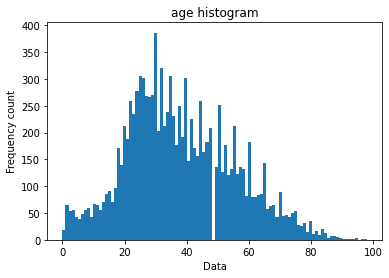

In [ ]:
plt.hist(case_test_drop_age['age'], bins=100)
plt.ylabel('Frequency count')
plt.xlabel('Data');
plt.title('age histogram')
plt.show()

In [ ]:
case_test_drop_age['sex'].isna().sum() /  case_test_drop_age['sex'].count()

0.02403889439092464

In [ ]:
case_test_drop_age['sex'].value_counts(normalize=True)

male      0.637436
female    0.362564
Name: sex, dtype: float64

In [ ]:
case_test_drop_age.sex = case_test_drop_age.apply(lambda row: random_genarator(row.sex), axis=1)
case_test_drop_age['sex'].value_counts(normalize=True,dropna=False)

male      0.638386
female    0.361614
Name: sex, dtype: float64

In [ ]:
def fill_missing_date_2(row):
  if row.date_confirmation == 0:

    # get mode of 
    mode = case_test_drop_age["date_confirmation"][case_test_drop_age["country"] == row["country"]].mode()[0]
    if mode == 0:
      return case_test_drop_age["date_confirmation"].mode()[0]
    return mode
  return row.date_confirmation

In [ ]:
case_test_drop_age.date_confirmation.fillna(0, inplace=True)
case_test_drop_age["date_confirmation"] = case_test_drop_age.apply(fill_missing_date_2, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def replace_province_2(row):
  if row['province'] == 0:
    try:
      location = geolocator.reverse(str(row["latitude"])+","+str(row["longitude"]), language='en')
      address = location.raw['address']
      result = address.get("state")
      if result != None:
        return result
      else:
        result = case_test_drop_age.province[case_test_drop_age["country"] == row["country"]].mode()[0]
        if result == 0:
          return row['country']
        return row['province']
    except Exception as e:
      return case_test_drop_age.province[case_test_drop_age["country"] == row["country"]].mode()[0]
  else:
    return row['province']


In [ ]:
case_test_drop_age.province.fillna(0, inplace=True)
case_test_drop_age["province"] = case_test_drop_age.apply(replace_province_2, axis=1)
case_test_drop_age.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:969: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  warn(f"Unable to sort modes: {err}")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


age     sex    province country  latitude  longitude date_confirmation  \
3    23  female   Karnataka   India  12.52735   76.89465        23.05.2020   
13   18    male       Bihar   India  25.23169   83.92138        21.05.2020   
14   26    male   Karnataka   India  17.33274   76.84035        27.05.2020   
16   21    male  Tamil Nadu   India  13.08362   80.28252        19.03.2020   
18   32  female  Tamil Nadu   India  13.08362   80.28252        13.05.2020   

                   additional_information  \
3               Returnees for Maharashtra   
13                                    NaN   
14              Travelled from Maharastra   
16  Returned from Dublin, Ireland on 17/3   
18                                    NaN   

                                               source  chronic_disease_binary  \
3   https://twitter.com/DHFWKA/status/126411013913...                   False   
13  https://twitter.com/BiharHealthDept/status/126...                   False   
14  https://twitter.com/DHFWKA/status/126554867154...                   False   
16  https://twitter.com/vijayabaskarofl/status/124...                   False   
18  https://stopcorona.tn.gov.in/wp-content/upload...                   False   

    outcome_group  
3             NaN  
13            NaN  
14            NaN  
16            NaN  
18            NaN

In [ ]:
case_test_drop_age["country"] = case_test_drop_age["country"].fillna(value="Taiwan")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
case_test_drop_age.isnull().sum()

age                           0
sex                           0
province                      0
country                       0
latitude                      0
longitude                     0
date_confirmation             0
additional_information     8242
source                       46
chronic_disease_binary        0
outcome_group             11374
dtype: int64

#1.5 Outliner


for test and train , we only remove age outliers

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
case_train_drop_age.age[(np.abs(stats.zscore(case_train_drop_age["age"])) > 3)].count()

40

In [ ]:
case_train_drop_age.latitude[(np.abs(stats.zscore(case_train_drop_age["latitude"])) > 3)].count()

284

In [ ]:
case_train_drop_age.latitude[(np.abs(stats.zscore(case_train_drop_age["longitude"])) > 3)].count()

161

In [ ]:
case_train_drop_age_z_score = case_train_drop_age[(np.abs(stats.zscore(case_train_drop_age["age"])) < 3)]
case_train_drop_age_z_score["age"].value_counts()

30    776
25    660
40    647
35    643
32    627
45    578
27    560
24    559
28    554
29    553
23    529
38    512
36    512
26    492
50    487
34    465
20    461
22    457
55    452
33    443
42    437
31    427
39    426
48    422
21    406
60    398
37    386
47    358
52    341
43    332
18    320
46    316
19    298
54    291
65    281
58    272
44    268
41    267
49    265
53    262
51    262
56    251
17    236
57    231
16    201
62    176
13    170
63    170
70    169
59    168
15    155
64    141
68    140
61    140
10    135
67    133
12    131
66    126
8     119
14    116
2     113
6     106
69    105
9     105
1     104
11    104
7     102
72    102
75    102
3     102
4      99
5      85
71     72
73     71
80     70
74     67
77     52
76     50
78     44
79     37
82     36
85     30
84     29
0      26
81     24
83     22
87     14
86     11
89     11
88      8
Name: age, dtype: int64

In [ ]:
case_train_drop_age_z_score.to_csv('./1.5_training_outlier.csv')

In [ ]:
case_test_drop_age_z_score = case_test_drop_age[(np.abs(stats.zscore(case_test_drop_age["age"])) < 3)]
case_test_drop_age_z_score["age"].value_counts()

30    386
32    320
35    306
25    305
40    302
     ... 
87      7
88      7
89      5
86      4
90      4
Name: age, Length: 91, dtype: int64

For location dataset, we decide not to exclude outliner, since it will effect the joining process in 1.6

In [ ]:
case_location.Confirmed[(np.abs(stats.zscore(case_location["Confirmed"])) > 3)].count()

46

In [ ]:
case_location.Deaths[(np.abs(stats.zscore(case_location["Deaths"])) > 3)].count()

36

In [ ]:
case_location.Recovered[(np.abs(stats.zscore(case_location["Recovered"])) > 3)].count()

0

In [ ]:
case_location.Active[(np.abs(stats.zscore(case_location["Active"])) > 3)].count()

0

In [ ]:
case_location.Incident_Rate[(np.abs(stats.zscore(case_location["Incident_Rate"])) > 3)].count()

0

In [ ]:
case_location.Case_Fatality_Ratio[(np.abs(stats.zscore(case_location["Case_Fatality_Ratio"])) > 3)].count()

0

#1.6 Joining

In [ ]:
case_location = case_location.replace("W.P. Kuala Lumpur","Wilayah Persekutuan Kuala Lumpur")
case_location = case_location.replace("Korea, South","South Korea")   
case_location = case_location.replace("Taiwan*","Taiwan") 
case_location = case_location.replace("Bayern","Bavaria") 

case_train_drop_age_z_score = case_train_drop_age_z_score.replace("Kanagawa Prefecture","Kanagawa")
case_train_drop_age_z_score = case_train_drop_age_z_score[case_train_drop_age_z_score.country!="United States"]
case_test_drop_age_z_score = case_test_drop_age_z_score.replace("Kanagawa Prefecture","Kanagawa")
case_test_drop_age_z_score = case_test_drop_age_z_score[case_test_drop_age_z_score.country!="United States"]

In [ ]:
jointed = pd.merge(case_train_drop_age_z_score, case_location, left_on=['province','country'],right_on=["Province_State","Country_Region"], how="left", indicator=True)

Due to the abense of province in some data in location dataset, some data did not join

In [ ]:
index_list = jointed[(jointed["_merge"] != "both") == True].index
index_list

Int64Index([   12,    23,    32,    45,    49,    55,    58,    63,    66,
               67,
            ...
            22917, 22929, 22931, 22934, 22940, 22943, 22945, 22956, 22958,
            22962],
           dtype='int64', length=3300)



---



In [ ]:
case_train_subset = case_train_drop_age_z_score.iloc[index_list]

case_train_subset.count()

age                       3300
sex                       3300
province                  3300
country                   3300
latitude                  3300
longitude                 3300
date_confirmation         3300
additional_information    3184
source                    3268
chronic_disease_binary    3300
outcome_group             3300
dtype: int64

In [ ]:
jointed2 = pd.merge(case_train_subset, case_location, left_on=['country'],right_on=["Combined_Key"], how="left", indicator=True)

In [ ]:
jointed2[(jointed2["_merge"] != "both") == True].count()

age                       0
sex                       0
province                  0
country                   0
latitude                  0
longitude                 0
date_confirmation         0
additional_information    0
source                    0
chronic_disease_binary    0
outcome_group             0
Province_State            0
Country_Region            0
Last_Update               0
Lat                       0
Long_                     0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
Combined_Key              0
Incident_Rate             0
Case_Fatality_Ratio       0
_merge                    0
dtype: int64

In [ ]:
jointed3 = pd.concat([jointed[(jointed["_merge"] == "both") == True],jointed2])

In [ ]:
jointed3.to_csv('./1.6.jointed_train.csv')

In [ ]:
jointed = pd.merge(case_test_drop_age_z_score, case_location, left_on=['province','country'],right_on=["Province_State","Country_Region"], how="left", indicator=True)
index_list = jointed[(jointed["_merge"] != "both") == True].index
case_test_subset = case_test_drop_age_z_score.iloc[index_list]
jointed2 = pd.merge(case_test_subset, case_location, left_on=['country'],right_on=["Combined_Key"], how="left", indicator=True)
jointed3 = pd.concat([jointed[(jointed["_merge"] == "both") == True],jointed2])

In [ ]:
jointed2[(jointed2["_merge"] != "both") == True].count()

age                       0
sex                       0
province                  0
country                   0
latitude                  0
longitude                 0
date_confirmation         0
additional_information    0
source                    0
chronic_disease_binary    0
outcome_group             0
Province_State            0
Country_Region            0
Last_Update               0
Lat                       0
Long_                     0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
Combined_Key              0
Incident_Rate             0
Case_Fatality_Ratio       0
_merge                    0
dtype: int64

In [ ]:
jointed3.to_csv('./1.6.jointed_test.csv')

#1.7
